# Generalized Linear Models


* * *
![Alt text](./images/linear_regression.png "Linear Regression Model")
* * *
Image Source: Wikipedia

## Introduction

[Linear Models](https://en.wikipedia.org/wiki/Linear_regression) are one of the oldest and most well known statistical prediction algorithms which nowdays is often categorized as a "machine learning algorithm." [Generalized Linear Models](https://en.wikipedia.org/wiki/Generalized_linear_model) (GLMs) are are a framework for modeling a response variable $y$ that is bounded or discrete. Generalized linear models allow for an arbitrary link function $g$ that relates the mean of the response variable to the predictors, i.e. $E(y) = g(β′x)$. The link function is often related to the distribution of the response, and in particular it typically has the effect of transforming between, $(-\infty ,\infty )$, the range of the linear predictor, and the range of the response variable (e.g. $[0,1]$). [1]

Therefore, GLMs allow for response variables that have error distribution models other than a normal distribution. Some common examples of GLMs are:
- [Poisson regression](https://en.wikipedia.org/wiki/Poisson_regression) for count data.
- [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) and [probit regression](https://en.wikipedia.org/wiki/Probit_regression) for binary data.
- [Multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) and [multinomial probit](https://en.wikipedia.org/wiki/Multinomial_probit) regression for categorical data.
- [Ordered probit](https://en.wikipedia.org/wiki/Ordered_probit) regression for ordinal data.



## Linear Models

In a linear model, given a vector of inputs, $X^T = (X_1, X_2, ..., X_p)$, we predict the output $Y$ via the model:

$$\hat{Y} = \hat{\beta}_0 + \sum_{j=1}^p X_j \hat{\beta}_j$$

The term $\hat{\beta}_0$ is the intercept, also known as the *bias* in machine learning.  Often it is convenient to include the constant variable $1$ in $X$, include $\beta_0$ in the vector of coefficients $\hat{\beta}$, and then write the linear model in vector form as an inner product, 

$$\hat{Y} = X^T\hat{\beta},$$

where $X^T$ denotes the transpose of the design matrix.  We will review the case where $Y$ is a scalar, however, in general $Y$ can have more than one dimension.  Viewed as a function over the $p$-dimensional input space, $f(X) = X^T\beta$ is linear, and the [gradient](https://en.wikipedia.org/wiki/Gradient), $f′(X) = \beta$, is a vector in input space that points in the steepest uphill direction.

### Ordinary Least Squares (OLS)

There are many different methods to fitting a linear model, but the most simple and popular method is [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS).  The OLS method minimizes the [residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares) (RSS), and leads to a closed-form expression for the estimated value of the unknown parameter $\beta$.

$$RSS(\beta) = \sum_{i=1}^n (y_i - x_i^T\beta)^2$$

$RSS(\beta)$ is a quadradic function of the parameters, and hence its minimum always exists, but may not be unique.  The solution is easiest to characterize in matrix notation:

$$RSS(\beta) = (\boldsymbol{y} - \boldsymbol{X}\beta)^T(\boldsymbol{y} - \boldsymbol{X}\beta)$$

where $\boldsymbol{X}$ is an $n \times p$ matrix with each row an input vector, and $\boldsymbol{y}$ is a vector of length $n$ representing the response in the training set.  Differentiating with respect to $\beta$, we get the *normal equations*, 

$$\boldsymbol{X}^T(\boldsymbol{y} - \boldsymbol{X}\beta) = 0$$

If $\boldsymbol{X}^T\boldsymbol{X}$ is [nonsingular](https://en.wikipedia.org/wiki/Invertible_matrix), then the unique solution is given by:

$$\hat{\beta} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

The fitted value at the $i^{th}$ input, $x_i$ is $\hat{y}_i = \hat{y}(x_i) = x_i^T\hat{\beta}$.  To solve this equation for $\beta$, we must invert a matrix, $\boldsymbol{X}^T\boldsymbol{X}$, however it can be computationally expensive to invert this matrix directly.  There are computational shortcuts for solving the normal equations available via [QR](https://en.wikipedia.org/wiki/QR_decomposition) or [Cholesky](https://en.wikipedia.org/wiki/Cholesky_decomposition) decomposition.  When dealing with large training sets, it is useful to have an understanding of the underlying computational methods in the software that you are using.  Some GLM software implementations may not utilize all available computational shortcuts, costing you extra time to train your GLMs, or require you to upgrade the memory on your machine.

## Regularization

http://web.stanford.edu/~hastie/Papers/glmpath.pdf


### Ridge Regression


Consider a sample consisting of $n$ cases, each of which consists of $p$ covariates and a single outcome. Let $y_i$ be the outcome and $X_i := ( x_1 , x_2 , … , x_p)^T$. 

Then the objective of Ridge is to solve:

$${\displaystyle \min _{\beta }\left\{{\frac {1}{N}}\sum _{i=1}^{N}\left(y_{i}-\beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^{2}\right\}{\text{ subject to }}\sum _{j=1}^{p}\beta _{j}^2 \leq t.}$$


Here $t$ is a prespecified free parameter that determines the amount of regularization.  Ridge is also called $\ell_2$ regularization.

### Lasso Regression

[Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics) (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 

- It was [introduced by Robert Tibshirani in 1996](http://www-stat.stanford.edu/%7Etibs/lasso/lasso.pdf) based on Leo Breiman’s Nonnegative Garrote.
- Lasso conveniently performs coefficient shrinkage comparable to the ridge regression as well as variable selection by reducing coefficients to zero. 
- By sacrificing a small amount of bias in the predicted response variable in order to decrease variance, the lasso achieves improved predictive accuracy compared with ordinary least squares (OLS) models, particularly with data containing highly correlated predictor variables or in over determined data where $p>n$.

Then the objective of Lasso is to solve:

$${\displaystyle \min _{\beta }\left\{{\frac {1}{N}}\sum _{i=1}^{N}\left(y_{i}-\beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^{2}\right\}{\text{ subject to }}\sum _{j=1}^{p}|\beta _{j}| \leq t.}$$

Here $t$ is a prespecified free parameter that determines the amount of regularization.
Lasso is also called $\ell_1$ regularization.


### Elastic Net

[Elastic Net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization) is a simple blend of Lasso and Ridge regularization.  In software, this is typically controlled by an `alpha` parameter in between 0 and 1, where:
- `alpha = 0.0` is Ridge regression
- `alpha = 0.5` is a 50/50 blend of Ridge/Lasso regression
- `alpha = 1.0` is Lasso regression

## Other Solvers

GLM models are trained by finding the set of parameters that maximizes the likelihood of the data.  For the Gaussian family, maximum likelihood consists of minimizing the mean squared error.  This has an analytical solution and can be
solved with a standard method of least squares.  This is also applicable when the $\ell_2$ penalty is added to the optimization.  For all other families and when the $\ell_1$ penalty is included, the maximum likelihood
problem has no analytical  solution.  Therefore an iterative method  such as IRLSM, L-BFGS, the Newton method, or gradient descent, must be used.


### Iteratively Re-weighted Least Squares (IRLS)

The [IRLS](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares) method is used to solve certain optimization problems with objective functions of the form:

$${\underset  {{\boldsymbol  \beta }}{\operatorname {arg\,min}}}\sum _{{i=1}}^{n}{\big |}y_{i}-f_{i}({\boldsymbol  \beta }){\big |}^{p},$$

by an iterative method in which each step involves solving a weighted least squares problem of the form:

$${\boldsymbol  \beta }^{{(t+1)}}={\underset  {{\boldsymbol  \beta }}{\operatorname {arg\,min}}}\sum _{{i=1}}^{n}w_{i}({\boldsymbol  \beta }^{{(t)}}){\big |}y_{i}-f_{i}({\boldsymbol  \beta }){\big |}^{2}.$$

IRLS is used to find the [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood) estimates of a generalized linear model as a way of mitigating the influence of outliers in an otherwise normally-distributed data set.  For example, by minimizing the least absolute error rather than the least square error.

One of the advantages of IRLS over [linear programming](https://en.wikipedia.org/wiki/Linear_programming) and [convex programming](https://en.wikipedia.org/wiki/Convex_programming) is that it can be used with [Gauss-Newton](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton) and [Levenberg-Marquardt](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt) numerical algorithms.

The IRL1 algorithm solves a sequence of non-smooth weighted $\ell_1$-minimization problems, and hence can be seen as the non-smooth counterpart to the IRLS algorithm. 


### Iteratively Re-weighted Least Squares with ADMM

The IRLS method with [alternating direction method of multipliers](http://web.stanford.edu/~boyd/admm.html) (ADMM) inner solver as described in [Distributed Optimization and Statistical Learning via the Alternating Direction Method of Multipliers](http://web.stanford.edu/~boyd/papers/admm_distr_stats.html) by Boyd et. al to deal with the $\ell_1$ penalty. ADMM is an algorithm that solves convex optimization problems by breaking them into smaller pieces, each of which are then easier to handle.  Every iteration of the algorithm consists of following steps:

1. Generate weighted least squares problem based on previous solution, i.e. vector of weights w and response z.
2. Compute the weighted [Gram matrix](https://en.wikipedia.org/wiki/Gramian_matrix) XT WX and XT z vector
3. Decompose the Gram matrix ([Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)) and apply ADMM solver to solve the  $\ell_1$ penalized least squares problem.

In the [H2O GLM](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/GLMBooklet.pdf) implementation, steps 1 and 2 are performed distributively, and Step 3 is computed in parallel on a single node.  The Gram matrix appraoch is very efficient for tall and narrow datasets when running lamnda search with a sparse solution. 


### Cyclical Coordinate Descent

The IRLS method can also use cyclical coordinate descent in it's inner loop (as opposed to ADMM).  The [glmnet](http://web.stanford.edu/~hastie/glmnet/glmnet_beta.html) package uses [cyclical coordinate descent](http://web.stanford.edu/~hastie/Papers/glmnet.pdf) which successively optimizes the objective function over each parameter with others fixed, and cycles repeatedly until convergence.

Cyclical  coordinate  descent  methods  are  a  natural  approach  for  solving
convex  problems  with $\ell_1$ or $\ell_2$ constraints,  or  mixtures  of  the  two  (elastic net).  Each coordinate-descent step is fast, with an explicit formula for each coordinate-wise minimization.  The method also exploits the sparsity of the model, spending much of its time evaluating only inner products for variables with non-zero coefficients.


### L-BFGS 

[Limited-memory BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) (L-BFGS) is an optimization algorithm in the family of [quasi-Newton methods](https://en.wikipedia.org/wiki/Quasi-Newton_method) that approximates the [Broyden–Fletcher–Goldfarb–Shanno](https://en.wikipedia.org/wiki/BFGS_method) (BFGS) algorithm using a limited amount of computer memory. Due to its resulting linear memory requirement, the L-BFGS method is particularly well suited for optimization problems with a large number of variables.  The method is popular among "big data" GLM implementations such as [h2o::h2o.glm()](http://www.rdocumentation.org/packages/h2o/functions/h2o.glm) (one of two available solvers) and [SparkR::glm()](https://spark.apache.org/docs/latest/api/R/index.html).  The [L-BFGS-B algorithm](http://sepwww.stanford.edu/data/media/public/docs/sep117/antoine1/paper_html/node12.html#lbfgsb) is an extension of the L-BFGS algorithm to handle simple bounds on the model. 

## Data Preprocessing

In order for the coefficients to be easily interpretable, the features must be centered and scaled (aka "normalized").  Many software packages will allow the direct input of categorical/factor columns in the training frame, however internally any categorical columns will be expaded into binary indicator variables.  The caret package offers a handy utility function, [caret::dummyVars()](http://www.rdocumentation.org/packages/caret/functions/dummyVars), for dummy/indicator expansion if you need to do this manually.

Missing data will need to be imputed, otherwise in many GLM packages, those rows will simply be omitted from the training set at train time.  For example, in the `stats::glm()` function there is an `na.action` argument which allows the user to do one of the three options:

- na.omit and na.exclude: observations are removed if they contain any missing values; if na.exclude is used some functions will pad residuals and predictions to the correct length by inserting NAs for omitted cases.
- na.pass: keep all data, including NAs
- na.fail: returns the object only if it contains no missing values

Other GLM implementations such as `h2o::glm()` will impute the mean automatically (in both training and test data), unless specified by the user.

***

# GLM Software in R

There is an implementation of the standard GLM (no regularization) in the built-in "stats" package in R called [glm](http://www.rdocumentation.org/packages/stats/functions/glm).

## glm

Authors: The original R implementation of glm was written by Simon Davies working for Ross Ihaka at the University of Auckland, but has since been extensively re-written by members of the R Core team.  The design was inspired by the S function of the same name described in Hastie & Pregibon (1992).

Backend: Fortran

### Example Linear Regression with glm()

In [1]:
#install.packages("caret")
library(caret)
data("Sacramento")

# Split the data into a 70/25% train/test sets
set.seed(1)
idxs <- caret::createDataPartition(y = Sacramento$price, p = 0.75)[[1]]
train <- Sacramento[idxs,]
test <- Sacramento[-idxs,]

Loading required package: lattice
Loading required package: ggplot2


In [2]:
# Fit the GLM
fit <- glm(price ~ ., 
           data = train, 
           family = gaussian())
summary(fit)


Call:
glm(formula = price ~ ., family = gaussian(), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-269404   -39233    -6677    27418   279476  

Coefficients: (32 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.434e+06  1.931e+07   0.385 0.700365    
cityAUBURN           1.450e+05  7.163e+04   2.024 0.043348 *  
cityCAMERON_PARK     3.497e+04  6.341e+04   0.551 0.581536    
cityCARMICHAEL       8.019e+04  2.699e+04   2.971 0.003078 ** 
cityCITRUS_HEIGHTS  -8.352e+03  2.222e+04  -0.376 0.707161    
cityCOOL             1.300e+05  1.015e+05   1.281 0.200691    
cityEL_DORADO        3.534e+04  1.061e+05   0.333 0.739141    
cityEL_DORADO_HILLS  1.243e+05  5.417e+04   2.295 0.022047 *  
cityELK_GROVE       -6.302e+04  5.984e+04  -1.053 0.292688    
cityELVERTA         -5.559e+04  5.066e+04  -1.097 0.272929    
cityFAIR_OAKS        6.136e+04  3.307e+04   1.855 0.064008 .  
cityFO

In [3]:
# Predict on the test set
pred <- predict(fit, newdata = test)

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor city has new levels DIAMOND_SPRINGS, GARDEN_VALLEY, PENRYN


Above we have a slight issue.  The `city` column has new factor levels in the test set that were not present in the training set.  Even though the `train` and `test` data frames originated from a single data frame, `Sacramento`, and therefore have identical factor levels, we still run into this problem.  Let's take a closer look at the factor levels to see what's going on:

In [4]:
str(train)

'data.frame':	700 obs. of  9 variables:
 $ city     : Factor w/ 37 levels "ANTELOPE","AUBURN",..: 34 34 34 34 34 29 31 34 34 34 ...
 $ zip      : Factor w/ 68 levels "z95603","z95608",..: 52 44 44 53 65 24 25 44 51 66 ...
 $ beds     : int  3 2 2 2 3 2 3 1 3 2 ...
 $ baths    : num  1 1 1 1 1 2 2 1 1 2 ...
 $ sqft     : int  1167 796 852 797 1122 941 1146 871 1020 1022 ...
 $ type     : Factor w/ 3 levels "Condo","Multi_Family",..: 3 3 3 3 1 1 3 3 3 3 ...
 $ price    : int  68212 68880 69307 81900 89921 94905 98937 106852 107502 108750 ...
 $ latitude : num  38.5 38.6 38.6 38.5 38.7 ...
 $ longitude: num  -121 -121 -121 -121 -121 ...


In [5]:
str(test)

'data.frame':	232 obs. of  9 variables:
 $ city     : Factor w/ 37 levels "ANTELOPE","AUBURN",..: 34 34 34 34 34 1 34 24 11 10 ...
 $ zip      : Factor w/ 68 levels "z95603","z95608",..: 64 66 49 64 52 67 57 19 9 8 ...
 $ beds     : int  2 3 3 3 3 3 3 3 3 3 ...
 $ baths    : num  1 2 1 2 2 2 2 2 2 2 ...
 $ sqft     : int  836 1104 1177 909 1289 1088 1248 1152 1116 1056 ...
 $ type     : Factor w/ 3 levels "Condo","Multi_Family",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ price    : int  59222 90895 91002 100309 106250 126640 132000 134555 138750 156896 ...
 $ latitude : num  38.6 38.7 38.5 38.6 38.5 ...
 $ longitude: num  -121 -121 -121 -121 -121 ...


Although `train` and `test` have identical structure, not all the levels are represented in the training data.  To validate this, let's take a look at the actual unique levels that were used in the model:

In [6]:
# Check the number of levels in the model features
sapply(fit$xlevels, function(x) print(length(x)))

[1] 34
[1] 65
[1] 3


city  zip type 
  34   65    3

We can manually fix this by updating the `xlevels` element of the model.  We have the same issue with `zip`, so we should go ahead and manually update that as well.

In [7]:
# Update factor levels so that prediction works
fit$xlevels[["city"]] <- union(fit$xlevels[["city"]], levels(test$city))
fit$xlevels[["zip"]] <- union(fit$xlevels[["zip"]], levels(test$zip))

In [8]:
# Predict on the test set
pred <- predict(fit, newdata = test)
summary(fit)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”


Call:
glm(formula = price ~ ., family = gaussian(), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-269404   -39233    -6677    27418   279476  

Coefficients: (32 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.434e+06  1.931e+07   0.385 0.700365    
cityAUBURN           1.450e+05  7.163e+04   2.024 0.043348 *  
cityCAMERON_PARK     3.497e+04  6.341e+04   0.551 0.581536    
cityCARMICHAEL       8.019e+04  2.699e+04   2.971 0.003078 ** 
cityCITRUS_HEIGHTS  -8.352e+03  2.222e+04  -0.376 0.707161    
cityCOOL             1.300e+05  1.015e+05   1.281 0.200691    
cityEL_DORADO        3.534e+04  1.061e+05   0.333 0.739141    
cityEL_DORADO_HILLS  1.243e+05  5.417e+04   2.295 0.022047 *  
cityELK_GROVE       -6.302e+04  5.984e+04  -1.053 0.292688    
cityELVERTA         -5.559e+04  5.066e+04  -1.097 0.272929    
cityFAIR_OAKS        6.136e+04  3.307e+04   1.855 0.064008 .  
cityFO

In [9]:
# Compute model performance on the test set

caret::R2(pred = pred, obs = test$price)
caret::RMSE(pred = pred, obs = test$price)

[1] 0.03715124

[1] 7173982

### GLM in caret

Now let's run the same model using caret's glm method to get a sense of how much easier it is to use.

In [10]:
# Train a caret glm model
fit <- caret::train(form = price ~ ., 
                    data = train, 
                    trControl = trainControl(method = "none"),   
                    method = "glm",  
                    family = gaussian())
summary(fit$finalModel)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-269404   -39233    -6677    27418   279476  

Coefficients: (38 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.434e+06  1.931e+07   0.385 0.700365    
cityAUBURN           1.450e+05  7.163e+04   2.024 0.043348 *  
cityCAMERON_PARK     3.497e+04  6.341e+04   0.551 0.581536    
cityCARMICHAEL       8.019e+04  2.699e+04   2.971 0.003078 ** 
cityCITRUS_HEIGHTS  -8.352e+03  2.222e+04  -0.376 0.707161    
cityCOOL             1.300e+05  1.015e+05   1.281 0.200691    
cityDIAMOND_SPRINGS         NA         NA      NA       NA    
cityEL_DORADO        3.534e+04  1.061e+05   0.333 0.739141    
cityEL_DORADO_HILLS  1.243e+05  5.417e+04   2.295 0.022047 *  
cityELK_GROVE       -6.302e+04  5.984e+04  -1.053 0.292688    
cityELVERTA         -5.559e+04  5.066e+04  -1.097 0.272929    
cityFAIR_OAKS        6.136e+04  3.307e+04   1.855 0.064008 . 

In [11]:
# Predict on the test set
pred <- predict(fit, newdata = test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [12]:
# Compute model performance on the test set

caret::R2(pred = pred, obs = test$price)
caret::RMSE(pred = pred, obs = test$price)

[1] 0.7338893

[1] 66030.84

Ok, this looks much better.  And we didn't have to deal with the missing factor levels! :-)

### h2o

Authors: Tomas Nykodym, H2O.ai contributors

Backend: Java

The [h2o](https://cran.r-project.org/web/packages/h2o/index.html) package offers a data-distributed implementation of Generalized Linear Models.  A "data-distribtued" version uses distributed data frames, so that the whole design matrix does not need to fit into memory at once.  The h2o package fits both regularized and non-regularized GLMs.  The implementation details are documented [here](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/GLMBooklet.pdf).

In [13]:
#h2o.shutdown(prompt = FALSE)

In [14]:
# h2o.glm example
#install.packages("h2o")
library(h2o)
h2o.init(nthreads = -1)  #Start a local H2O cluster using nthreads = num available cores


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         15 minutes 42 seconds 
    H2O cluster version:        3.10.5.3 
    H2O cluster version age:    1 month and 8 days  
    H2O cluster name:           H2O_started_from_R_robertstevens_ppr077 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.44 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.4.1 (2017-06-30) 



Typically one would load a dataset in parallel from disk using the `h2o.importFile()` function, however for the purposes of this tutorial, we are going to use a tiny built-in R dataset, so we can send that data to the H2O cluster (from R memory) using the `as.h2o()` function.  We would also use the `h2o.splitFrame()` function to split the data instead of the `caret::createDataPartition()`, but for an apples-to-apples comparison with the methods above, it's good to use the same exact train and test split, generated the same way as above.

In [15]:
# Load Sacramento dataset
library(caret)
data("Sacramento")

# Convert the data into an H2OFrame
sac <- as.h2o(Sacramento)

# Split the data into a 70/25% train/test sets
set.seed(1)
idxs <- caret::createDataPartition(y = Sacramento$price, p = 0.75)[[1]]
train <- sac[idxs,]
test <- sac[-idxs,]

# Dimensions
dim(train)
dim(test)

# Columns
names(train)

  |======================================================================| 100%


[1] 700   9

[1] 232   9

[1] "city"      "zip"       "beds"      "baths"     "sqft"      "type"     
[7] "price"     "latitude"  "longitude"

In [16]:
# Identify the predictor columns
xcols <- setdiff(names(train), "price")

# Train a default GLM model with no regularization
system.time(fit <- h2o.glm(x = xcols,
                           y = "price",
                           training_frame = train,
                           family = "gaussian",
                           lambda = 0))  #lambda = 0 means no regularization

  |======================================================================| 100%


   user  system elapsed 
  0.198   0.006   0.275 

In [17]:
summary(fit)

Model Details:

H2ORegressionModel: glm
Model Key:  GLM_model_R_1502162171177_4340 
GLM Model: summary
    family     link regularization number_of_predictors_total
1 gaussian identity           None                        110
  number_of_active_predictors number_of_iterations  training_frame
1                         104                    0 RTMP_sid_adfc_2

H2ORegressionMetrics: glm
** Reported on training data. **

MSE:  4140191405
RMSE:  64344.32
MAE:  46055.84
RMSLE:  0.2853132
Mean Residual Deviance :  4140191405
R^2 :  0.7653286
Null Deviance :1.234975e+13
Null D.o.F. :699
Residual Deviance :2.898134e+12
Residual D.o.F. :595
AIC :17699.32





Scoring History: 
            timestamp   duration iteration negative_log_likelihood
1 2017-08-07 22:32:07  0.000 sec         0    12349752226576.09961
          objective
1 17642503180.82300

Variable Importances: (Extract with `h2o.varimp`) 

Standardized Coefficient Magnitudes: standardized coefficient magnitudes
        names  coeffici

In [18]:
# H2O computes many model performance metrics automatically, accessible by utility functions

perf <- h2o.performance(model = fit, newdata = test)
h2o.r2(perf)
sqrt(h2o.mse(perf))

[1] 0.7377706

[1] 64293.34

### speedglm

Also worth metioning is the [speedglm](https://cran.r-project.org/web/packages/speedglm/index.html) package, which fits Linear and Generalized Linear Models to large data sets. This is particularly useful if R is linked against an optimized [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms). For data sets of size greater of R memory, the fitting is performed by an iterative algorithm.

## Regularized GLM in R

Ok, so let's assume that we have wide, sparse, collinear or big data.  If your training set falls into any of those categories, it might be a good idea to use a regularlized GLM.

### glmnet

Authors: [Jerome Friedman](https://statweb.stanford.edu/~jhf/), [Trevor Hastie](http://web.stanford.edu/~hastie/), [Noah Simon](http://faculty.washington.edu/nrsimon/), [Rob Tibshirani](http://statweb.stanford.edu/~tibs/)

Backend: [Mortran](https://en.wikipedia.org/wiki/Mortran) (extension of Fortran used for scientific computation)

[glmnet](http://web.stanford.edu/~hastie/glmnet/glmnet_beta.html) is a package that fits a generalized linear model via penalized maximum likelihood. The regularization path is computed for the lasso or elastic-net penalty at a grid of values for the regularization parameter lambda. The algorithm is extremely fast, and can exploit sparsity in the input matrix $\boldsymbol{X}$.

Features:

- The code can handle sparse input-matrix formats, as well as range constraints on coefficients. 
- Glmnet also makes use of the strong rules for efficient restriction of the active set.  
- The core of Glmnet is a set of fortran subroutines, which make for very fast execution. 
- The algorithms use coordinate descent with warm starts and active set iterations. 
- Supports the following distributions: `"gaussian","binomial","poisson","multinomial","cox","mgaussian"`
- Supports standardization and offsets.

The Glmnet package is a fast implementation, but it requires some extra processing up-front to your data if it's not already represented as a numeric matrix.  For example, if you have categorical data or missing data, you need to deal with that yourself.

In [19]:
#install.packages("glmnet")
#install.packages("Cairo")  #for plotting lasso coefficients in Jupyter notebook
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



In [20]:
data("QuickStartExample")  #loads 'x' and 'y'
str(x)
class(x)

 num [1:100, 1:20] 0.274 2.245 -0.125 -0.544 -1.459 ...


[1] "matrix"

In [21]:
fit <- glmnet(x, y)

We can visualize the coefficients by executing the `plot` function.  Each curve corresponds to a variable. It shows the path of its coefficient against the $\ell_1$-norm of the whole coefficient vector at as $\lambda$ varies. The axis above indicates the number of nonzero coefficients at the current $\lambda$, which is the effective degrees of freedom for the lasso.

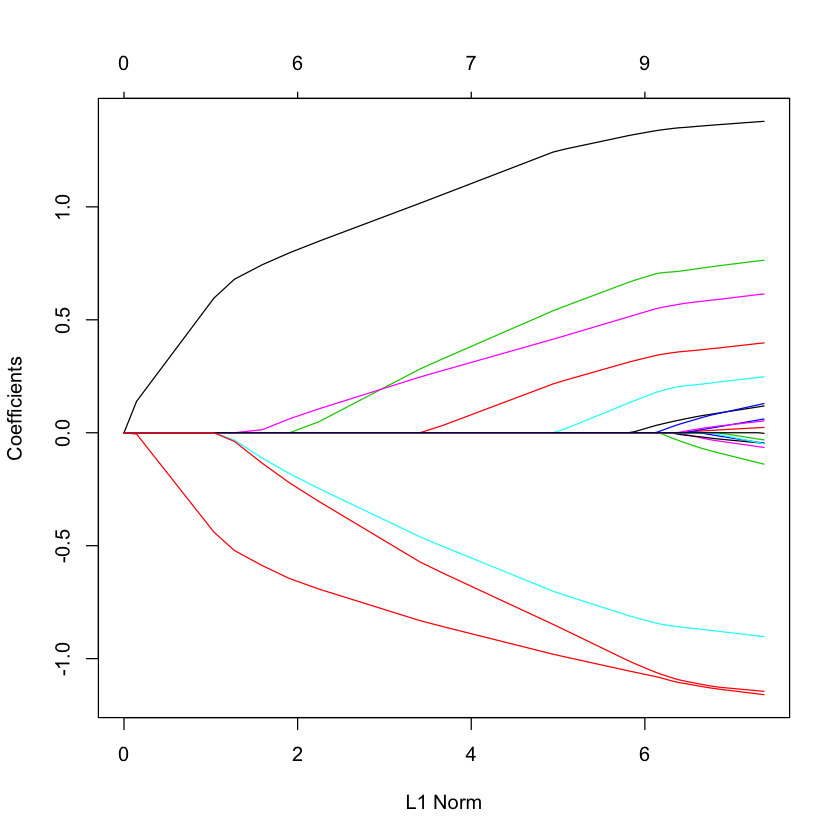

In [22]:
plot(fit)

In [ ]:
# TO DO: Add caret::twoClassSim example for comparison instead of "QuickStartExample"

In [28]:
# Simulate a binary response dataset
library(caret)
set.seed(1)
df <- caret::twoClassSim(n = 100000,
                         linearVars = 10, 
                         noiseVars = 50, 
                         corrVars = 50)
dim(df)

[1] 100000    116

In [29]:
# Identify the response & predictor columns
ycol <- "Class"
xcols <- setdiff(names(df), ycol)
df[ , ycol] <- ifelse(df[ , ycol] == "Class1", 0, 1)

# Split the data into a 70/25% train/test sets
set.seed(1)
idxs <- caret::createDataPartition(y = df[,ycol], p = 0.75)[[1]]
train <- df[idxs, ]
test <- df[-idxs, ]
train_y <- df[idxs, ycol]
test_y <- df[-idxs, ycol]
train_x <- model.matrix(~ -1 + ., train[, xcols])
test_x <- model.matrix(~ -1 + ., test[, xcols])


# Dimensions
dim(train_x)
length(train_y)
dim(test_x)
length(test_y)

[1] 75000   115

[1] 75000

[1] 25000   115

[1] 25000

In [30]:
head(test_y)

[1] 0 1 1 0 0 0

In [31]:
# Train a Lasso GLM
system.time(cvfit <- cv.glmnet(x = train_x,
                               y = train_y,
                               family = "binomial",
                               alpha = 1.0))  # alpha = 1 means lasso by default

   user  system elapsed 
 44.013   1.107  45.232 

In [32]:
preds <- predict(cvfit$glmnet.fit, 
                newx = test_x, 
                s = cvfit$lambda.min, 
                type = "response")
head(preds)

,1
2,0.3136236
14,0.6544411
15,0.9269314
21,0.1027764
29,0.6640567
30,0.5079524


In [33]:
#install.packages("cvAUC")
library(cvAUC)

cvAUC::AUC(predictions = preds, labels = test_y)

Loading required package: ROCR
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:h2o’:

    hour, month, week, year

 
cvAUC version: 1.1.0
Notice to cvAUC users: Major speed improvements in version 1.1.0
 


[1] 0.9082888

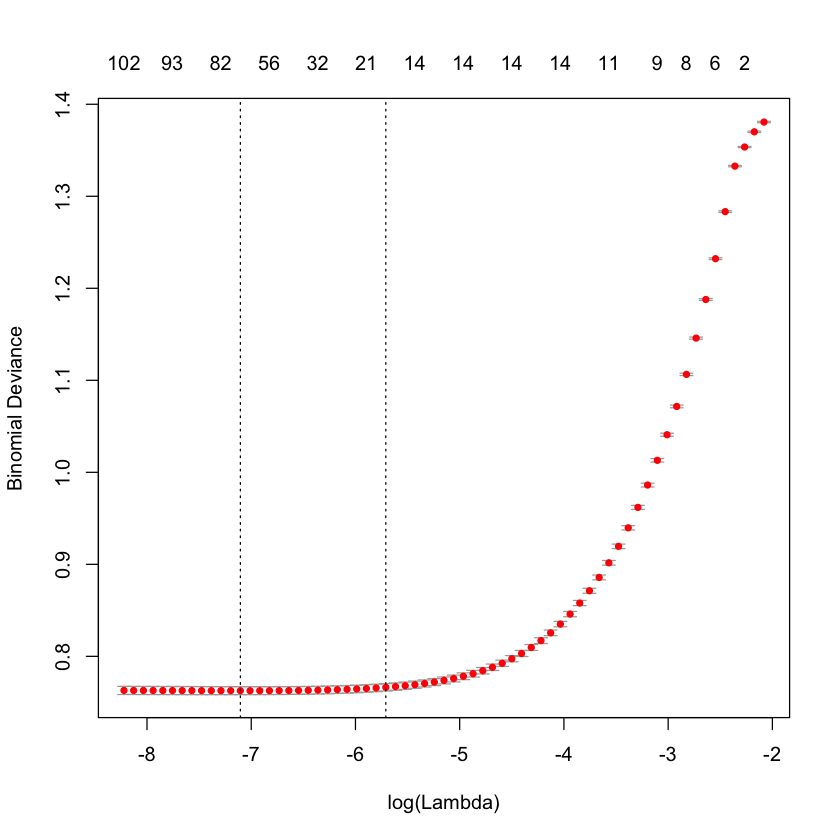

In [34]:
plot(cvfit)

In [35]:
coef(cvfit, s = "lambda.min")

116 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -8.499067e-01
TwoFactor1  -1.496125e+00
TwoFactor2   1.499321e+00
Linear01     6.028101e-03
Linear02    -9.881539e-01
Linear03     8.945190e-01
Linear04    -7.841655e-01
Linear05     7.087525e-01
Linear06    -5.750003e-01
Linear07     5.090654e-01
Linear08    -3.687028e-01
Linear09     2.825630e-01
Linear10    -1.949350e-01
Nonlinear1   5.949233e-01
Nonlinear2   5.011606e-01
Nonlinear3   5.991373e-01
Noise01      .           
Noise02      1.043126e-02
Noise03     -1.079100e-02
Noise04     -4.079763e-03
Noise05     -6.621020e-03
Noise06      .           
Noise07      .           
Noise08      .           
Noise09      .           
Noise10     -5.318611e-03
Noise11      .           
Noise12     -1.448212e-03
Noise13      .           
Noise14      .           
Noise15      3.953435e-03
Noise16      1.496612e-03
Noise17      .           
Noise18     -2.786811e-02
Noise19     -8.935897e-03
Noise20      .       

### h2o

Introduced in the previous section, the h2o package can perform unregularized or regularized regression.  By default, `h2o.glm` will perform an Elastic Net regression.  Similar to the `glmnet` function, you can adjust the Elastic Net penalty through the `alpha` parameter (`alpha = 1.0` is Lasso and `alpha = 0.0` is Ridge).

In [36]:
# Simulate a binary response dataset
library(caret)
set.seed(1)
df <- caret::twoClassSim(n = 100000,
                         linearVars = 10, 
                         noiseVars = 50, 
                         corrVars = 50)
dim(df)

[1] 100000    116

In [37]:
# Convert the data into an H2OFrame
library(h2o)
h2o.init(nthreads = -1)
hf <- as.h2o(df)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         23 minutes 53 seconds 
    H2O cluster version:        3.10.5.3 
    H2O cluster version age:    1 month and 8 days  
    H2O cluster name:           H2O_started_from_R_robertstevens_ppr077 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.44 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.4.1 (2017-06-30) 

  |======================================================================| 100%


In [38]:
# Identify the response & predictor columns
ycol <- "Class"
xcols <- setdiff(names(hf), ycol)

# Convert the 0/1 binary response to a factor 
hf[ , ycol] <- as.factor(hf[ , ycol])

In [98]:
dim(df)

[1] 100000    116

In [39]:
# Split the data into a 70/25% train/test sets
set.seed(1)
idxs <- caret::createDataPartition(y = df[,ycol], p = 0.75)[[1]]
train <- hf[idxs,]
test <- hf[-idxs,]

# Dimensions
dim(train)
dim(test)

[1] 75001   116

[1] 24999   116

In [ ]:
# Train a Lasso GLM
system.time(fit <- h2o.glm(x = xcols,
                           y = ycol,
                           training_frame = train,
                           family = "binomial",
                           lambda_search = TRUE,  # compute lasso path
                           alpha = 1))  # alpha = 1 means lasso, same as glmnet above

In [ ]:
# Compute AUC on test dataset
# H2O computes many model performance metrics automatically, including AUC

perf <- h2o.performance(model = fit,
                        newdata = test)
h2o.auc(perf)

# References

[1] [https://en.wikipedia.org/wiki/Linear_regression#Generalized\_linear\_models](https://en.wikipedia.org/wiki/Linear_regression#Generalized_linear_models)

[2] [https://en.wikipedia.org/wiki/Generalized\_linear\_model](https://en.wikipedia.org/wiki/Generalized_linear_model)

[3] [Tibshirani, R. (1996). Regression shrinkage and selection via the lasso. J. Royal. Statist. Soc B., Vol. 58, No. 1, pages 267-288). ](http://www-stat.stanford.edu/%7Etibs/lasso/lasso.pdf)
